In [270]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as ny
import pandas as ps
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import tree
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [271]:
def performance_evaluation(tp, tn, fp, fn, beta=1.0):

   accuracy = (tp + tn) / (tp + fp + fn + tn)
   sensitivity = tp / (tp + fn)
   specificity = tn / (fp + tn)
   precision = tp / (tp + fp)
   recall = sensitivity
   f_score = ( (beta**2 + 1) * precision * recall) / (beta**2 * precision + recall)
   auc = (sensitivity + specificity) / 2
   youden = sensitivity - (1 - specificity)
   p_plus = sensitivity / (1 - specificity)
   p_minus = (1 - sensitivity) / specificity
   dp = (ny.sqrt(3) / ny.pi) * (ny.log(sensitivity/(1 - sensitivity) + ny.log(specificity/(1 - specificity))))

   result = {}
   result["tp"] = tp
   result["tn"] = tn
   result["fp"] = fp
   result["fn"] = fn
   result["accuracy"] = accuracy
   result["sensitivity"] = sensitivity
   result["specificity"] = specificity
   result["precision"] = precision
   result["recall"] = recall
   result["f-score"] = f_score
   result["AUC"] = auc
   result["Youden"] = youden
   result["p+"] = p_plus
   result["p-"] = p_minus
   result["DP"] = dp

   return result

In [272]:
set = ps.read_csv("voice.csv")


In [273]:
set.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [274]:
ny.mean(set)

meanfreq     0.180907
sd           0.057126
median       0.185621
Q25          0.140456
Q75          0.224765
IQR          0.084309
skew         3.140168
kurt        36.568461
sp.ent       0.895127
sfm          0.408216
mode         0.165282
centroid     0.180907
meanfun      0.142807
minfun       0.036802
maxfun       0.258842
meandom      0.829211
mindom       0.052647
maxdom       5.047277
dfrange      4.994630
modindx      0.173752
dtype: float64

In [275]:
set.label = [1 if each == "female" else 0 for each in set.label]


In [276]:
y =set.label.values
X = set.drop(['label'],axis=1)
ny.min(X)

meanfreq    0.039363
sd          0.018363
median      0.010975
Q25         0.000229
Q75         0.042946
IQR         0.014558
skew        0.141735
kurt        2.068455
sp.ent      0.738651
sfm         0.036876
mode        0.000000
centroid    0.039363
meanfun     0.055565
minfun      0.009775
maxfun      0.103093
meandom     0.007812
mindom      0.004883
maxdom      0.007812
dfrange     0.000000
modindx     0.000000
dtype: float64

In [277]:
x = (X -ny.min(X)) / (ny.max(X)-ny.min(X)). values
x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.436911,0.684871,0.570361,0.198513,0.686256,0.577704,0.046854,0.003489,0.921665,0.901057,0.717272,0.436911,0.698762,0.380813,0.904450,0.279703,0.006452,0.192280,0.192418,0.173674
3164,0.362946,0.731172,0.262871,0.171937,0.702595,0.621185,0.015961,0.000333,0.912549,0.834545,0.048868,0.362946,0.732760,0.126776,0.981526,0.305791,0.075269,0.167977,0.166667,0.298053
3165,0.484949,0.799042,0.690337,0.134329,0.786967,0.742124,0.050161,0.003469,0.855587,0.765849,0.028592,0.484949,0.847759,0.153011,0.981526,0.164908,0.006452,0.134024,0.134120,0.208885
3166,0.492516,0.745692,0.695311,0.175136,0.767804,0.681107,0.041908,0.002539,0.870307,0.792241,0.757865,0.492516,0.641561,0.127158,0.834600,0.265621,0.006452,0.164046,0.164163,0.333559


In [278]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
svm = SVC(C=1,gamma=1,kernel='rbf')
svm.fit(xtrain, ytrain)
SVM_f=svm.predict(xtest)
conf = confusion_matrix(ytest, SVM_f)

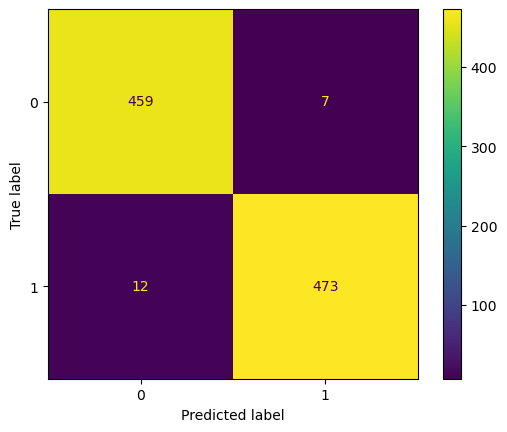

In [279]:
plot_confusion_matrix(svm, xtest, ytest)  
plt.show()

In [280]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
SVM_results = performance_evaluation(TP, TN, FP, FN)
SVM_results.get("Youden")
SVM_results

{'tp': 473,
 'tn': 459,
 'fp': 7,
 'fn': 12,
 'accuracy': 0.9800210304942166,
 'sensitivity': 0.9752577319587629,
 'specificity': 0.9849785407725322,
 'precision': 0.9854166666666667,
 'recall': 0.9752577319587629,
 'f-score': 0.9803108808290156,
 'AUC': 0.9801181363656475,
 'Youden': 0.9602362727312951,
 'p+': 64.92430044182635,
 'p-': 0.02511960110504685,
 'DP': 2.0812956448947815}

In [281]:
#DecisionTreeClassifier

In [282]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
dectree = DecisionTreeClassifier()
dectree.fit(xtrain, ytrain)
DT_f=dectree.predict(xtest) 
conf = confusion_matrix(ytest, DT_f)

In [283]:
tree.export_graphviz(dectree, out_file='deccision_tree_2.dot',
                     feature_names=['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx'],
                     class_names=['Female','Male'],
                     label='all',
                     rounded=True,
                     filled=True)

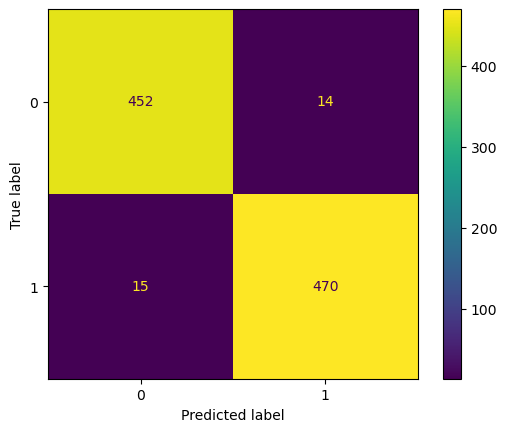

In [284]:
plot_confusion_matrix(dectree, xtest, ytest)  
plt.show()

In [285]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
DT_results = performance_evaluation(TP, TN, FP, FN)
DT_results

{'tp': 470,
 'tn': 452,
 'fp': 14,
 'fn': 15,
 'accuracy': 0.9695057833859095,
 'sensitivity': 0.9690721649484536,
 'specificity': 0.9699570815450643,
 'precision': 0.9710743801652892,
 'recall': 0.9690721649484536,
 'f-score': 0.9700722394220845,
 'AUC': 0.969514623246759,
 'Youden': 0.9390292464935179,
 'p+': 32.256259204712755,
 'p-': 0.03188577684517836,
 'DP': 1.9571326983954749}

In [286]:
#Logistic Regression

In [287]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.2,random_state = 30)
logreg = LogisticRegression(solver='liblinear',penalty='l1')
logreg.fit(xtrain, ytrain)
LogReg_f=logreg.predict(xtest)
conf = confusion_matrix(ytest, LogReg_f)

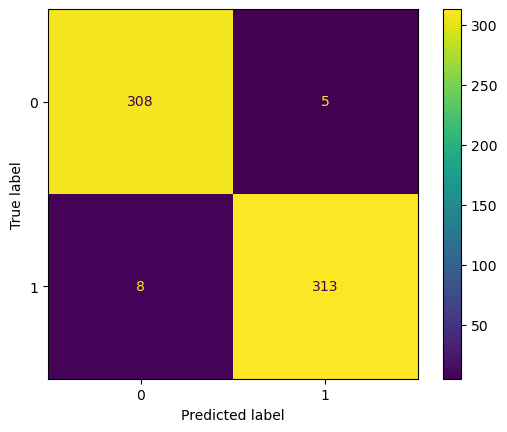

In [288]:
plot_confusion_matrix(logreg, xtest, ytest)  
plt.show()

In [289]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
LogReg_results = performance_evaluation(TP, TN, FP, FN)
LogReg_results

{'tp': 313,
 'tn': 308,
 'fp': 5,
 'fn': 8,
 'accuracy': 0.9794952681388013,
 'sensitivity': 0.9750778816199377,
 'specificity': 0.9840255591054313,
 'precision': 0.9842767295597484,
 'recall': 0.9750778816199377,
 'f-score': 0.9796557120500782,
 'AUC': 0.9795517203626845,
 'Youden': 0.959103440725369,
 'p+': 61.03987538940815,
 'p-': 0.025326698223894488,
 'DP': 2.076799120704391}

In [290]:
#RandomForestClassifier 

In [291]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
randforest = RandomForestClassifier (n_estimators=100)
randforest.fit(xtrain, ytrain)
RF_f=randforest.predict(xtest) 
conf = confusion_matrix(ytest, RF_f)

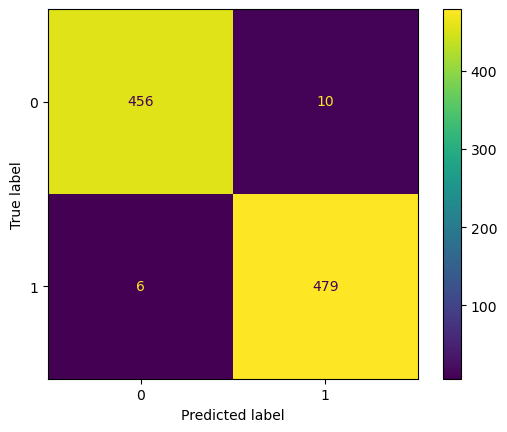

In [292]:
plot_confusion_matrix(randforest, xtest, ytest)  
plt.show()

In [293]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
RF_results = performance_evaluation(TP, TN, FP, FN)
RF_results

{'tp': 479,
 'tn': 456,
 'fp': 10,
 'fn': 6,
 'accuracy': 0.9831756046267087,
 'sensitivity': 0.9876288659793815,
 'specificity': 0.9785407725321889,
 'precision': 0.9795501022494888,
 'recall': 0.9876288659793815,
 'f-score': 0.9835728952772074,
 'AUC': 0.9830848192557852,
 'Youden': 0.9661696385115703,
 'p+': 46.0235051546392,
 'p-': 0.012642430819316286,
 'DP': 2.440556689640832}

In [294]:
#KNeighborsClassifier 


In [295]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit (xtrain, ytrain)
KNN_f=knn.predict(xtest) 
conf = confusion_matrix(ytest, KNN_f)

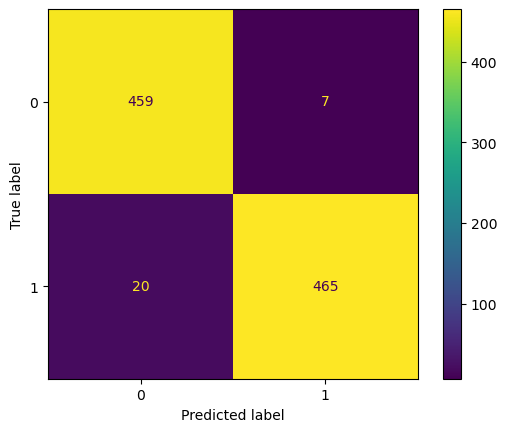

In [296]:
plot_confusion_matrix(knn, xtest, ytest)  
plt.show()

In [297]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
KNN_results = performance_evaluation(TP, TN, FP, FN)
KNN_results

{'tp': 465,
 'tn': 459,
 'fp': 7,
 'fn': 20,
 'accuracy': 0.9716088328075709,
 'sensitivity': 0.9587628865979382,
 'specificity': 0.9849785407725322,
 'precision': 0.9851694915254238,
 'recall': 0.9587628865979382,
 'f-score': 0.9717868338557993,
 'AUC': 0.9718707136852351,
 'Youden': 0.9437414273704704,
 'p+': 63.82621502209144,
 'p-': 0.04186600184174468,
 'DP': 1.8258644473747896}

In [298]:
#GradientBoostingClassifier 


In [299]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gbc.fit(xtrain, ytrain)
GBC_f=gbc.predict(xtest) 
conf = confusion_matrix(ytest, GBC_f)

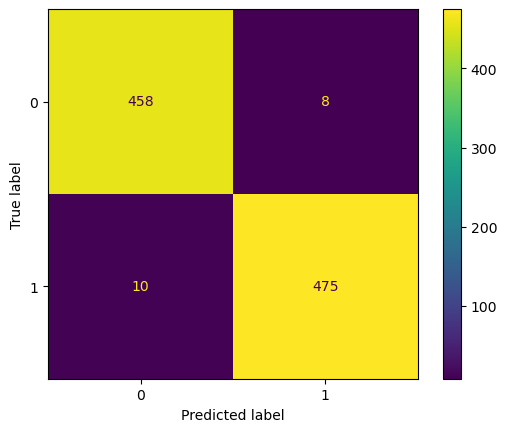

In [300]:
plot_confusion_matrix(gbc, xtest, ytest)  
plt.show()

In [301]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
GCB_results = performance_evaluation(TP, TN, FP, FN)
GCB_results

{'tp': 475,
 'tn': 458,
 'fp': 8,
 'fn': 10,
 'accuracy': 0.9810725552050473,
 'sensitivity': 0.979381443298969,
 'specificity': 0.9828326180257511,
 'precision': 0.9834368530020704,
 'recall': 0.979381443298969,
 'f-score': 0.981404958677686,
 'AUC': 0.98110703066236,
 'Youden': 0.9622140613247201,
 'p+': 57.0489690721649,
 'p-': 0.020978706163057706,
 'DP': 2.173615443204584}

In [ ]:
#Deep Neural_Net

In [302]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
nn = MLPClassifier(solver='sgd',activation= 'logistic',learning_rate_init=1,hidden_layer_sizes=(15,10))

nn.fit (xtrain, ytrain)
NN_f=nn.predict(xtest) 
conf = confusion_matrix(ytest, NN_f)

C:\Users\ronys\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


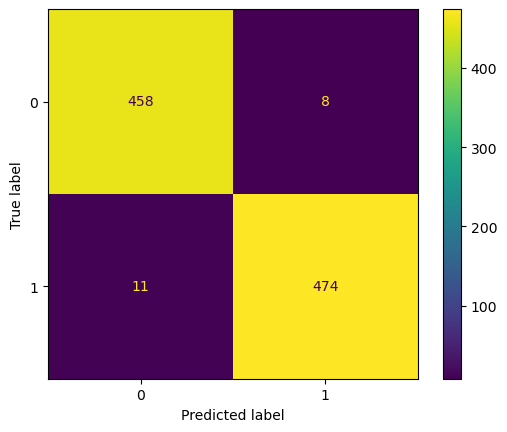

In [303]:
plot_confusion_matrix(nn, xtest, ytest)  
plt.show()

In [304]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
NN_results = performance_evaluation(TP, TN, FP, FN)
NN_results
NN_results.get("Youden")

0.960152205654617

In [305]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


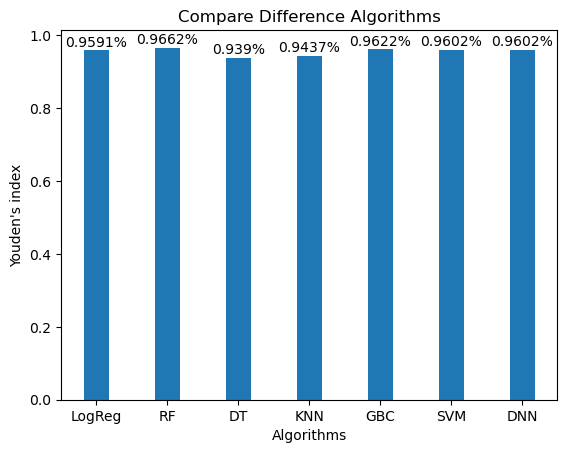

In [306]:
from matplotlib import pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

x = ['LogReg', 'RF', 'DT', 'KNN', 'GBC', 'SVM','DNN']
logReg = "{:.4f}".format(LogReg_results.get("Youden"))
rf = "{:.4f}".format(RF_results.get("Youden"))
dt = "{:.4f}".format(DT_results.get("Youden"))
knn = "{:.4f}".format(KNN_results.get("Youden"))
gbc = "{:.4f}".format(GCB_results.get("Youden"))
svm = "{:.4f}".format(SVM_results.get("Youden"))
nn = "{:.4f}".format(NN_results.get("Youden"))


y = [float(logReg),float(rf),float(dt),float(knn),float(gbc),float(svm),float(nn)]

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')
ax.set_ylabel("Youden's index")
ax.set_xlabel('Algorithms')
ax.set_title('Compare Difference Algorithms')


for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.01,
      s="{}%".format(height),
      ha='center')
   
plt.savefig('barChart.png')
plt.show()